In [1]:
what_we_are_covering=['0. An end-to-end Scikit-Learn workflow'
'1. Getting the data ready',
'2. Choose the right estimator/algorith for our problems',
'3. Fit the model/alogrithm and use it to make predictions on our data.',
'4. Evaulating a model',
'5. Improve a model',
'6. Save and load a trained model',
'7. Putting it all together']

In [2]:
what_we_are_covering

['0. An end-to-end Scikit-Learn workflow1. Getting the data ready',
 '2. Choose the right estimator/algorith for our problems',
 '3. Fit the model/alogrithm and use it to make predictions on our data.',
 '4. Evaulating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together']

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


## 1.Getting our data ready to be used with machine learning

Three main things we have to do :
    1. Split the data into features and labels (usually 'X' & 'y')
    2.Filling (also called imputing ) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [4]:
heart_disease=pd.read_csv('heart-disease.csv')

heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
X = heart_disease.drop('target',axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [6]:
y= heart_disease.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [7]:
#Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [9]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1
200,44,1,0,110,197,0,0,177,0,0.0,2,1,2
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3
27,51,1,2,110,175,0,1,123,0,0.6,2,0,2
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3


### 1.1 Make sure its all numerical

In [10]:
car_sales=pd.read_csv('car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [11]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [12]:
len(car_sales)

1000

In [13]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [14]:
#Split the data into X,y
X=car_sales.drop('Price',axis=1)
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [15]:
y=car_sales['Price']
y

0      15323
1      19943
2      28343
3      13434
4      14043
       ...  
995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, Length: 1000, dtype: int64

In [16]:
#Split the data into training and test sets

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
y_train

185    14189
728    29363
970    16416
20     24130
944    24304
       ...  
823    18440
322    10429
470    11773
299    15184
786    20108
Name: Price, Length: 800, dtype: int64

In [17]:
#Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model= RandomForestRegressor()
model.fit(X_train,y_train)

model.score(X_test,y_test)

ValueError: could not convert string to float: 'Nissan'

In [18]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [19]:
#Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']

one_hot=OneHotEncoder()

transformer=ColumnTransformer([('one_hot',
                               one_hot,
                               categorical_features)],
                             remainder='passthrough')

transformed_X=transformer.fit_transform(X)

pd.DataFrame(transformed_X)



,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [20]:
dummies=pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [21]:
#Lets refit the model

np.random.seed(42)
X_train, X_test,y_train,y_test=train_test_split(transformed_X,
                                               y,
                                               test_size=0.2)

model.fit(X_train, y_train);

In [22]:
model.score(X_train,y_train)

0.891612713353635

In [23]:
model.score(X_test,y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.


In [24]:
# Import car sales missing data

car_sales_missing= pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [25]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [26]:
X=car_sales_missing.drop('Price', axis=1)
y=car_sales_missing['Price']


### Option 1 : Fill missing data with Pandas

In [27]:
# Fill the 'Make' column

car_sales_missing['Make'].fillna('missing',inplace=True)

#Fill the 'Colour' column
car_sales_missing['Colour'].fillna('missing',inplace=True)

#Fill the 'Odometer (KM)' column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)

#Fill the 'Doors' column

car_sales_missing['Doors'].fillna(4,inplace=True)

In [28]:
#Remove rows with missing price value

car_sales_missing.dropna(inplace=True)



In [29]:
X=car_sales_missing.drop('Price', axis=1)
y=car_sales_missing['Price']

In [30]:
# Lets try and convert our data into numbers

#Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']

one_hot=OneHotEncoder()

transformer=ColumnTransformer([('one_hot',
                               one_hot,
                               categorical_features)],
                             remainder='passthrough')

transformed_X=transformer.fit_transform(car_sales_missing)

transformed_X


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [31]:
transformed_X[0]

array([0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 3.5431e+04,
       1.5323e+04])

### Option 2: Fill missing values with Scikit-Learn

In [32]:
car_sales_missing=pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [33]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [34]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [35]:
#Split into X and y
X=car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']

#Split data into train and test sets

X_train,X_test,y_train,y_test= train_test_split(X,
                                               y,
                                               test_size=0.2)


In [36]:
#Fill missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer=SimpleImputer(strategy='constant',fill_value='missing')
door_imputer=SimpleImputer(strategy='constant',fill_value=4)
num_imputer=SimpleImputer(strategy='mean')


In [37]:
# Define different column features
categorical_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

In [38]:
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, categorical_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_feature)])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train

array([['Toyota', 'Black', 4.0, 86696.0],
       ['Toyota', 'Black', 4.0, 20714.0],
       ['Toyota', 'White', 4.0, 134415.0],
       ...,
       ['Honda', 'Blue', 4.0, 224900.0],
       ['missing', 'White', 3.0, 19482.0],
       ['Honda', 'Blue', 4.0, 199833.0]], dtype=object)

In [39]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Black,4,86696
1,Toyota,Black,4,20714
2,Toyota,White,4,134415
3,Toyota,Green,4,130710
4,Honda,White,4,145850
...,...,...,...,...
755,Nissan,Blue,4,111256
756,Honda,White,4,246079
757,Honda,Blue,4,224900
758,missing,White,3,19482


In [40]:
# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.66960e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.07140e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.34415e+05],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.24900e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.94820e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.99833e+05]])

In [41]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.09497633411335504

### 2. Choosing the right estimator/algorith for our problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm.


* Classification -predicting whether a sample is one thing or another
* Regression- predicting a number

### 2.1 Picking  a machine learning model for a regression problem

In [42]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston=load_boston()
boston


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [43]:
boston_df=pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston_df['target']=pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [44]:
#no of samples
len(boston_df)

506

In [45]:
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [46]:
# Lets try ridge regression model

from sklearn.linear_model import Ridge

#Setup random seed

np.random.seed(42)

#Create data
X=boston_df.drop('target',axis=1)
y=boston_df['target']

#Split into train and test sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


model=Ridge()
model.fit(X_train,y_train)

#Check the scores of model

model.score(X_test,y_test)

0.6662221670168522

How do  we improve this score?


In [47]:
# Lets try the random forest regressor
from sklearn.ensemble import RandomForestRegressor

#setup random seed

np.random.seed(42)

X=boston_df.drop('target',axis=1)
y=boston_df['target']

#Split the data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instatiate Random forest regressor

rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)


rf.score(X_test,y_test)

0.8654448653350507

In [48]:
#Check the ridge model again

model.score(X_test,y_test)

0.6662221670168522

### 2.2 Choosing an estimator for a classification problem


In [49]:
heart_disease=pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Consulting the map and it says to try `LinearSVC`

In [50]:
#Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

#setup random seed
np.random.seed(42)

#Make the data
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']


#Split the data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)
#Instantiate LinearSVC
model=LinearSVC(max_iter=1000);
model.fit(X_train,y_train);
#Evaluate the Linear SVC
model.score(X_test,y_test)


C:\Users\punee\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [51]:
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#Make the data
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']


#Split the data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)
#Instantiate RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train);
clf.score(X_test,y_test)

0.8524590163934426

Tidbit:
   1. If u have structured data, use ensembble methods
   2. If u have unstructured data, use deep learning or transfer learning.

## 3. Fit the model/alogrithm and use it to make predictions on our data.


### 3.1 Fitting the model to the data

Different names for :
* `X`=features, features variables, data
* `y`= labels, targets, target variables

In [52]:
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#Make the data
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']


#Split the data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)


#Instantiate RandomForestClassifier
clf=RandomForestClassifier()


#Fit the model to the data
clf.fit(X_train,y_train);


#Evaluate the Random Forest Classifier
clf.score(X_test,y_test)

0.8524590163934426

In [53]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [54]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1.`predict()`
2.`predict_proba()`

In [55]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [56]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [57]:
#Compare predictions to truth labels to evaulate the model

y_preds= clf.predict(X_test)

np.mean(y_preds==y_test)

0.8524590163934426

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

 Make predictions with `predict_proba()`

In [59]:
#predict_proba() returns probabilities of a classification label

clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [60]:
#Lets predict() on same data..
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [61]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` can also be used for regression models

In [62]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [63]:

from sklearn.ensemble import RandomForestRegressor


np.random.seed(42)

X=boston_df.drop('target',axis=1)
y=boston_df['target']



X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)



rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)


rf.score(X_test,y_test)

y_preds=rf.predict(X_test)

In [64]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [65]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [66]:
#Compare the predictions to the truth

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_preds)

2.136382352941176

## 4.Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric

###  4.1 Evaluating a model with `score` method

In [67]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier();
clf.fit(X_train,y_train);


In [68]:
clf.score(X_train,y_train)

1.0

In [69]:
clf.score(X_test,y_test)

0.8524590163934426

Doing the same but for regression

In [70]:

from sklearn.ensemble import RandomForestRegressor


np.random.seed(42)

X=boston_df.drop('target',axis=1)
y=boston_df['target']



X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)



rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)



RandomForestRegressor()

In [71]:
rf.score(X_test,y_test)

0.8654448653350507

### 4.2 Evaluating a model using the `scoring` parameter

In [72]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier();
clf.fit(X_train,y_train);

In [73]:
clf.score(X_test,y_test)

0.8524590163934426

In [74]:
cross_val_score(clf,X,y,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [75]:
np.random.seed(42)

#single training and test split score

clf_single_score= clf.score(X_test,y_test)

#Take the mean of 5-fold cross-validation-score

clf_cross_val_score=np.mean(cross_val_score(clf,X,y,cv=5))
 #Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [76]:
#Scoring parameter set to None by default
np.random.seed(42)

cross_val_score(clf,X,y,cv=5,scoring=None)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

## 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [77]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop('target', axis=1)
y= heart_disease['target']

clf=RandomForestClassifier()
cross_val_score=cross_val_score(clf,X,y,cv=5)

In [79]:
np.mean(cross_val_score)

0.8248087431693989

In [80]:
print(f'Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%')

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**
 
* Area under curve (AUC)
* ROC curve


ROC curves are a comparison of a model's true positive rate(tpr) versus a model's false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative= model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [81]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)


In [82]:
from sklearn.metrics import roc_curve

clf.fit(X_train,y_train)

y_probs= clf.predict_proba(X_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [83]:
y_probs_positive= y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [84]:
#Calculate fpr,tpr and thresholds

fpr,tpr,thresholds= roc_curve(y_test, y_probs_positive)

#check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

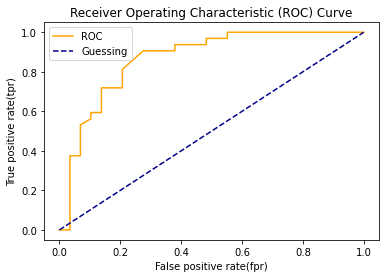

In [85]:
#Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC given the fpr and tpr of a model.
    """
    #Plot roc curve
    plt.plot(fpr,tpr,color='orange', label='ROC')
    #Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--', label='Guessing')
    
    #Customize the plot
    plt.xlabel('False positive rate(fpr)')
    plt.ylabel('True positive rate(tpr)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    

plot_roc_curve(fpr,tpr)

In [86]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

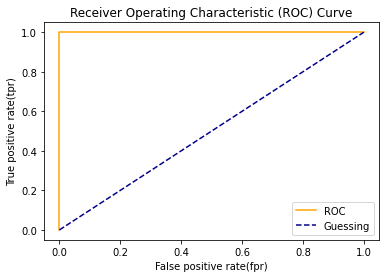

In [87]:
#Plot perfect ROC curve and AUC score
fpr,tpr,thresholds=roc_curve(y_test,y_test)

plot_roc_curve(fpr,tpr)

In [88]:
#Perfect Auc Score

roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts it was supposed to predict.

In essence, giving you an idea of where model is getting confused.

In [89]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [92]:
#Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=['Actual Label'],
           colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


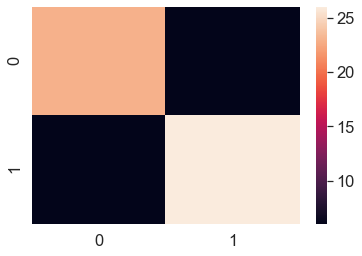

In [95]:
#Make our confusion matrix more visual with seaborn heatmap

import seaborn as sns

sns.set(font_scale=1.5)

#Create a confusion matrix

conf_mat= confusion_matrix(y_test,y_preds)

sns.heatmap(conf_mat);